# Online Retail Analysis

#### Variable Table
| Variable Name | Role | Type | Description | Units | Missing Values |
| -------- | ------- | ------- | ------- | ------- | ------- |
| InvoiceNo | ID | Categorical | a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation | |no
| StockCode | ID | Categorical | a 5-digit integral number uniquely assigned to each distinct product | |no
| Description | Feature | Categorical | Product name| |no
| Quantity  | Feature | Integer | the quantities of each product (item) per transaction | |no
| InvoiceDate  | Feature | Date | the day and time when each transaction was generated | |no
| UnitPrice  | Feature | Continuous | product price per unit | sterling |no
| CustomerID  | Feature | Categorical | a 5-digit integral number uniquely assigned to each customer|  |no
| Country  | Feature | Categorical | the name of the country where each customer resides|  |no

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta
le = LabelEncoder()

# Import Data

In [214]:
file_path = "Online Retail.xlsx"
data = pd.read_excel(file_path)
print(data.shape)
data.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [216]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [217]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Cleaning Data

#### 1. Remove the cancelation data out of the dataset
#### 2. drop null values and unrelvent columns and transactions. (There are some special descriptions which is not directly related with sales, so we can remove thoes rows.) 

In [218]:
# List of descriptions to remove
unwanted_descriptions = ["Manual", "POSTAGE", "DOTCOM POSTAGE", "CRUK Commission"]
# Remove rows where "Description" is in the unwanted list
data = data[~data["Description"].isin(unwanted_descriptions)]

#### Create some new columns that benefit furthering analysis

In [219]:
data["Amount"] = data["Quantity"] * data['UnitPrice']
data["Year"] = data['InvoiceDate'].dt.year
data["Month"] = data['InvoiceDate'].dt.month
data["Day"] = data['InvoiceDate'].dt.day
data["Time"] = data['InvoiceDate'].dt.time
data["Country_ID"] = le.fit_transform(data['Country'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Day,Time,Country_ID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,08:26:00,36
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00,36
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,08:26:00,36
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00,36
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00,36


# Exploratory Analysis
1. What are the most purchased products in the platform?

In [220]:
Top_products = data.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending = False).head(10).reset_index()
Top_products

,StockCode,Description,Quantity
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,85099B,JUMBO BAG RED RETROSPOT,47363
2,84879,ASSORTED COLOUR BIRD ORNAMENT,36381
3,22197,POPCORN HOLDER,36334
4,21212,PACK OF 72 RETROSPOT CAKE CASES,36039
5,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025
6,23084,RABBIT NIGHT LIGHT,30680
7,22492,MINI PAINT SET VINTAGE,26437
8,22616,PACK OF 12 LONDON TISSUES,26315
9,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24753


C:\Users\jenny\AppData\Local\Temp\ipykernel_24936\2538349945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Description', y = 'Quantity', data = Top_products, palette = "pastel")


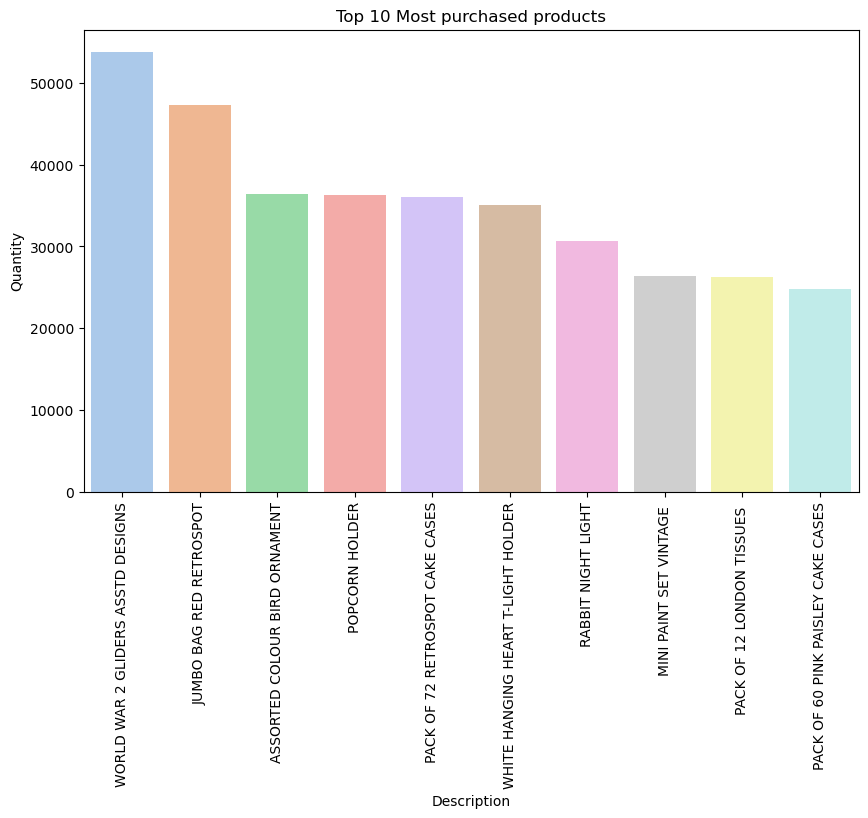

In [221]:
plt.figure(figsize= (10,6))
plt.title("Top 10 Most purchased products")
sns.barplot(x = 'Description', y = 'Quantity', data = Top_products, palette = "pastel")
plt.xticks(rotation = 90)
plt.show()

2. People from which country are trancasting more?

In [222]:
Customer_regions = data.groupby(["Country", "Country_ID"])['Quantity'].sum().sort_values(ascending = False).head(5).reset_index()
Customer_regions

,Country,Country_ID,Quantity
0,United Kingdom,36,4259497
1,Netherlands,24,200509
2,EIRE,10,142639
3,Germany,14,116342
4,France,13,109693


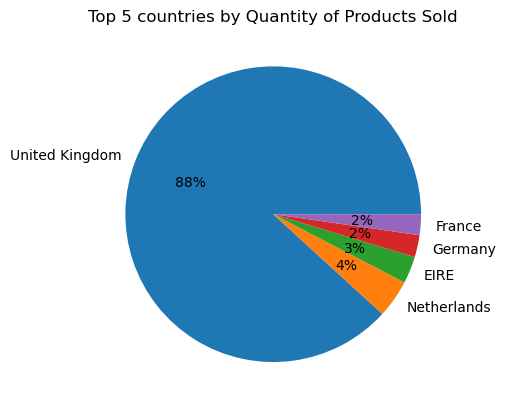

In [223]:
plt.pie(x = Customer_regions['Quantity'].astype(int), labels= Customer_regions['Country'], autopct='%.0f%%')
plt.title("Top 5 countries by Quantity of Products Sold")
plt.show()

3. What is the trend of transactions for the given period?

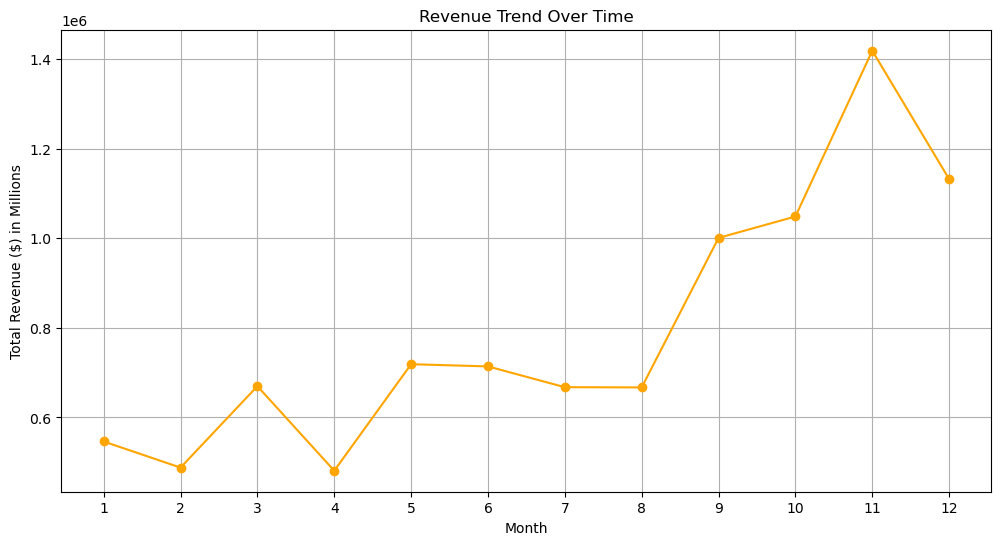

In [231]:
monthly_sales = data.groupby('Month')["Amount"].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color="orange")
plt.title("Revenue Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($) in Millions")
plt.grid()
plt.show()

## RFM Modeling
To do the RFM analysis, we need to create 3 features from the data:
1. Recency: Latest date-Last invoice date. (Number of  days since the last purchase date)
2. Frequency: Count of invoice numbers. (Total number of transactions made by a unique customer)
3. Monetary: Sum of total sales. (Total value of transacted sales by each customer)

Moreover, the current data includes the records about cancaled transactions which are the records would affect the outcome of RFM analysis since the return and cancelations are not successful purchases. Therefore, we need to drop those rows to optimize the analysis. 

In [267]:
df = data.copy()
df = df[~df['InvoiceNo'].astype(str).str.startswith("C")]
df = df.dropna(subset=['CustomerID']) #RFM analysis focus on analysing the customer segmentation, so for the rows whom CustomerID is null are irrelevant. 

In [269]:
def RFM_Features(df, customerID, invoiceDate, transID, Sales):
    lastest_date = df[invoiceDate].max() + timedelta(1)
    RFMScores = df.groupby(customerID).agg({invoiceDate: lambda x:(lastest_date - x.max()).days,
                                            transID: lambda x:len(x),
                                            Sales: lambda x:sum(x)})
    RFMScores[invoiceDate] = RFMScores[invoiceDate].astype(int)
    RFMScores.rename(columns = {invoiceDate: "Recency",
                               transID: 'Frequency',
                               Sales: 'Monetary'}, inplace = True)
    return RFMScores.reset_index()

In [271]:
RFM_df = RFM_Features(df, "CustomerID", "InvoiceDate", "InvoiceNo", "Amount")

In [273]:
RFM_df.sort_values(by = ["Frequency"], ascending = False)

,CustomerID,Recency,Frequency,Monetary
4009,17841.0,2,7838,40967.72
1880,14911.0,1,5675,140450.72
1290,14096.0,4,5095,53258.43
326,12748.0,1,4580,32317.32
1662,14606.0,1,2698,12021.65
...,...,...,...,...
4090,17948.0,147,1,358.56
2790,16148.0,296,1,76.32
2786,16144.0,247,1,175.20
4073,17925.0,373,1,244.08


In [275]:
Quantiles = RFM_df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.50, 0.75])
Quantiles = Quantiles.to_dict()
print(Quantiles)

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0}, 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0}, 'Monetary': {0.25: 305.7175, 0.5: 668.075, 0.75: 1631.3275}}


In [277]:
def RFMRanking(x, variable, Quantiles):
    if variable == "Recency":
        if x <= Quantiles[variable][0.25]:
            return 4
        elif (x > Quantiles[variable][0.25]) & (x <= Quantiles[variable][0.5]):
            return 3
        elif (x > Quantiles[variable][0.5]) & (x <= Quantiles[variable][0.75]):
            return 2
        else:
            return 1
    if variable in ("Frequency", "Monetary"):
        if x <= Quantiles[variable][0.25]:
            return 1
        elif (x > Quantiles[variable][0.25]) & (x <= Quantiles[variable][0.5]):
            return 2
        elif (x > Quantiles[variable][0.5]) & (x <= Quantiles[variable][0.75]):
            return 3
        else:
            return 4

In [283]:
RFM_df["R"] = RFM_df['Recency'].apply(lambda x: RFMRanking(x, "Recency", Quantiles))
RFM_df["F"] = RFM_df['Frequency'].apply(lambda x: RFMRanking(x, "Frequency", Quantiles))
RFM_df["M"] = RFM_df["Monetary"].apply(lambda x: RFMRanking(x, "Monetary", Quantiles))

RFM_df['Group'] = RFM_df["R"].astype(str) + RFM_df["F"].astype(str) + RFM_df["M"].astype(str)
RFM_df['RFM Score'] = RFM_df["R"].astype(int) + RFM_df["F"].astype(int) + RFM_df["M"].astype(int)
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,RFM Score
0,12346.0,326,1,77183.60,1,1,4,114,6
1,12347.0,2,182,4310.00,4,4,4,444,12
2,12348.0,75,27,1437.24,2,2,3,223,7
3,12349.0,19,72,1457.55,3,3,3,333,9
4,12350.0,310,16,294.40,1,1,1,111,3


In [285]:
RFM_df['Group'].nunique()

61

#### It might have 64 (4 ** 3) kinds of combations of groups, but in this case we only have 61. 
#### Moreover, we can use the customer in Bronze class which is the group of customer that have potential to churn. Therefore, Company might have to do something to bring them back or found out what went wrong and avoid losing them. 

In [287]:
quartiles_RFMscore = RFM_df["RFM Score"].quantile([0.25, 0.5, 0.75]).to_dict()
quartiles_RFMscore

{0.25: 5.0, 0.5: 7.0, 0.75: 10.0}

# Loyalty level segmentation
Classify customers into 4 different classes which support the Marketing department to plan new Marketing strategies targeting different classes.

Based on the RFM score, we can differentiate cutomers into 4 classes, including Platinum, Gold, Sliver, and Bronze. This customer segmentaion can help Marketing department to plan different marketing plan for different classes to maximun the profit. 

In [290]:
def assign_loyalty_quartile(x, quartiles_RFMscore):
    if x <= quartiles_RFMscore[0.25]:
        return "Bronze"
    elif x <= quartiles_RFMscore[0.5]:
        return "Sliver"
    elif x<= quartiles_RFMscore[0.75]:
        return "Gold"
    else:
        return "Platinum"

In [292]:
RFM_df["Loyalty_level"] = RFM_df["RFM Score"].apply(lambda x: assign_loyalty_quartile(x, quartiles_RFMscore))
RFM_df

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,RFM Score,Loyalty_level
0,12346.0,326,1,77183.60,1,1,4,114,6,Sliver
1,12347.0,2,182,4310.00,4,4,4,444,12,Platinum
2,12348.0,75,27,1437.24,2,2,3,223,7,Sliver
3,12349.0,19,72,1457.55,3,3,3,333,9,Gold
4,12350.0,310,16,294.40,1,1,1,111,3,Bronze
...,...,...,...,...,...,...,...,...,...,...
4331,18280.0,278,10,180.60,1,1,1,111,3,Bronze
4332,18281.0,181,7,80.82,1,1,1,111,3,Bronze
4333,18282.0,8,12,178.05,4,1,1,411,6,Sliver
4334,18283.0,4,754,2088.93,4,4,4,444,12,Platinum


In [137]:
order = ["Bronze", "Sliver", "Gold","Platinum"]
RFM_df.groupby("Loyalty_level")[['Recency', 'Frequency', 'Monetary', 'RFM Score']].mean().reindex(order)

,Recency,Frequency,Monetary,RFM Score
Loyalty_level,,,,
Bronze,193.224537,14.944444,245.596529,4.094907
Sliver,86.968478,33.919565,643.832990,6.488043
Gold,46.435249,83.040613,1395.621703,8.982375
Platinum,12.812352,292.391924,6598.411318,11.557007


1. **Platinum**: People in this group are the most loyal customers, who brought most often and are heavy spenders. These customers are the people who might be your first adopter or promoter when company launch a new product, so continue rewarding them is one of key plan for marketing. 
2. **Gold**: This group is the second loyal customers to your company, offering membership or loyalty programs is one of possible way to make them become Platinum member.
3. **Sliver**: This group of the people is whom does not order frequently, but spend a good amount of each orders. Personal campaigns, offers and product recommendations will help to reconnect them. 
4. **Bronze**: These customers are the group of people who used to visit the websit, but have not order recently. Run servey asking about the reason why they stop visiting website to avoide losing them is the urgent action. 

In [313]:
RFM_df.to_csv("rfm_data.csv", index=False)
df.to_csv("Sales.csv", index = False)

### Key insights and Reflection

1. This dataset has less features, so it has some limited to analyse further, but it is possible to build dashboard to give a brief picture pf current customer, and understand the market position.
2. If wanted to analyse further, can collecting historical data to understand the reason why Broze customers disconnected with the company and stop ordering from the Website -> Customr Churn Analysis
3. with more and more data coming, running a predictive analysis to forcast the Churn customer is also a good idea to gain insight.